In [23]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import warnings
import tensorflow as tf

warnings.filterwarnings("ignore")

# Loading Data

In [7]:
df = pd.read_csv('pima-indians-diabetes.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Input Variables (X):

### 0 Number of times pregnant
### 1 Plasma glucose concentration a 2 hours in an oral glucose tolerance test
### 2 Diastolic blood pressure (mm Hg)
### 3 Triceps skin fold thickness (mm)
### 4 2-Hour serum insulin (mu U/ml)
### 5 Body mass index (weight in kg/(height in m)^2)
### 6 Diabetes pedigree function
### 7 Age (years)

# Output Variables (y):

### Class variable (0 or 1) 

In [8]:
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',  
         'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class']
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Splitting into input and output classes

In [13]:
X = df.iloc[:, :-1]  # All rows, all columns except the last
y = df.iloc[:, -1]   # All rows, just the last column

In [14]:
X_scaled = scale(X) 
print('Scaled_X:\n', X_scaled)

Scaled_X:
 [[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


# Split dataset into 'train' & 'test' sets

In [15]:


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [25]:
y_train = to_categorical(y_train)

print('Y_Train Encoded:\n', y_train)

Y_Train Encoded:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


# 2. Define Keras Model
##### The model design:

##### 3 layers.
##### 22 total neurons.
##### Relu & Sigmoid activation functions.

In [26]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# 3. Compile Keras Model

In [27]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. Fit Keras Model

In [28]:
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150


2024-11-08 10:31:55.669287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 102ms/step - accuracy: 0.5712 - loss: 0.6842 - val_accuracy: 0.5941 - val_loss: 0.6593
Epoch 2/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6494 - loss: 0.6399 - val_accuracy: 0.6706 - val_loss: 0.6287
Epoch 3/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7363 - loss: 0.5914 - val_accuracy: 0.6824 - val_loss: 0.6033
Epoch 4/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7071 - loss: 0.5678 - val_accuracy: 0.7118 - val_loss: 0.5838
Epoch 5/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7174 - loss: 0.5435 - val_accuracy: 0.7235 - val_loss: 0.5693
Epoch 6/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7687 - loss: 0.5344 - val_accuracy: 0.7176 - val_loss: 0.5589
Epoch 7/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7371 - loss: 0.5446 - val_accuracy: 0.7412 - val_loss: 0.5479
Epoch 8/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7724 - loss: 0.5118 - val_accuracy: 0.7294 - val

In [29]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8574 - loss: 0.3083
Accuracy: 82.49


In [30]:
predictions = np.argmax(model.predict(X_test), axis=-1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


# 7. Plot against loss and accuracy
#### The plots can provide an indication of useful things about the training of the model, such as:

#### It’s speed of convergence over epochs (slope).
#### Whether the model may have already converged (plateau of the line).
#### Whether the mode may be over-learning the training data (inflection for validation line).

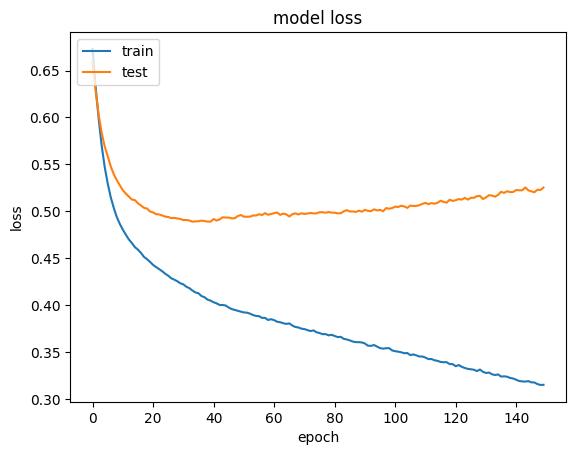

In [32]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

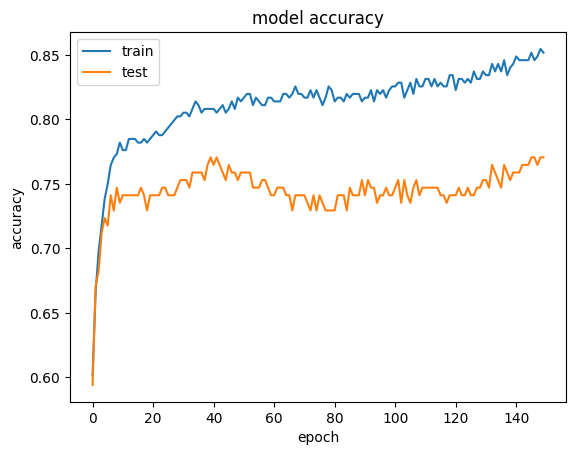

In [33]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
# Save in HDF5 format
model.save('my_model.keras')